In [1]:
# Load the dataset (https://www.kaggle.com/datasets/chandramoulinaidu/spam-classification-for-basic-nlp)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
git_url = 'https://raw.githubusercontent.com/SiddTayi/Learning-Hub-/refs/heads/main/NLP/SpamEmailText.csv'
df = pd.read_csv(git_url)
df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


Spam Detection Target: CATEGORY\
1: Yes\
0: No

In [3]:
df['CATEGORY'].value_counts()

,count
CATEGORY,
0,3900
1,1896


In [4]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
test = "Hey,, GGgggG fell down. <HTML><bass> 'read' random"
test_tokenized = tokenizer.tokenize(test)
test_tokenized

['Hey', 'GGgggG', 'fell', 'down', 'HTML', 'bass', 'read', 'random']

In [5]:
import re
# Email validation
email_pattern = r"^[\w\.-]+@[\w\.-]+\.\w+$"
print(re.match(email_pattern, "user@example.com"))

<re.Match object; span=(0, 16), match='user@example.com'>


In [6]:
# Convert the tokenized words: tokens to lower case
lowercase_text = [t.lower() for t in test_tokenized]
lowercase_text

['hey', 'gggggg', 'fell', 'down', 'html', 'bass', 'read', 'random']

## LEMMATIZING

In [7]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

test_msg_lem_tokens = [lem.lemmatize(t) for t in lowercase_text]
test_msg_lem_tokens

['hey', 'gggggg', 'fell', 'down', 'html', 'bass', 'read', 'random']

## STOPWORDS

Stopwords: Most commonly used words in English such as: a, an, the, is, has, had, it, etc.

Filtering the stopwords will not only save space but also decreases the time to understand and learn the text.

In [8]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

# Get all the words that are not in the stopwords list
test_msg_useful_tokens = [t for t in test_msg_lem_tokens if t not in stopwords]
test_msg_useful_tokens


['hey', 'gggggg', 'fell', 'html', 'bass', 'read', 'random']

### COMBINE ALL THE FUNCTIONS IN ONE SINGLE FUNC.

In [9]:
def transform_text(s):
    # 1. Tokenize
    token = tokenizer.tokenize(s)
    # 2. Lower Case
    lower_cased = [t.lower() for t in token]
    # 3. Lemmatize
    lem_token = [lem.lemmatize(t) for t in lower_cased]
    # 4. Check for stopwords
    useful_tokens = [t for t in lem_token if t not in stopwords]

    return useful_tokens
test = 'Hello, My name is SidT! Machine Learning is awesome!'
transform_text(test)

['hello', 'name', 'sidt', 'machine', 'learning', 'awesome']

## PLAY WITH THE DATASET

In [10]:
df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [11]:
# Drop the index column
df = df.sample(frac = 1, random_state = 1)
df = df.reset_index(drop = True)

# Train and Test set
split_ratio = int(len(df)*0.8)
train_df, test_df = df[:split_ratio], df[split_ratio:]

train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)


df.shape, train_df.shape, test_df.shape

((5796, 3), (4636, 3), (1160, 3))

In [12]:
train_df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"\n\n<HTML><FONT BACK=""#ffffff"" style=""BACKGRO...",00118.141d803810acd9d4fc23db103dddfcd9
1,1,"<html><body bgColor=""#CCCCCC"" topmargin=1 onMo...",00463.0bc4e08af0529dd773d9f10f922547db
2,0,Quoting Paul Linehan (plinehan@yahoo.com):\n\n...,00358.87ee38040ac1f42320c7b89628b1850a
3,0,<a href=http://www.aaronsw.com/weblog/>\n\nAar...,01274.0d083a2d3b30061efdc2cc73ee9e76e3
4,0,"Oh yeah, the link for more info:\n\n\n\nhttp:/...",00756.2b2ec73ad20a4e0bdf31632ac019233b


### PERFORM ALL THE OPERATIONS ABOVE ON THE DATASET: Message

In [13]:
token_counter = {}

for message in train_df['MESSAGE']:
    transforming_text = transform_text(message)

    for token in transforming_text:
        # Frequency of each word. If found, increment the value to 1.
        if token in token_counter:
            token_counter[token] += 1
        else: # If not found, store and set the value to 1.
            token_counter[token] = 1

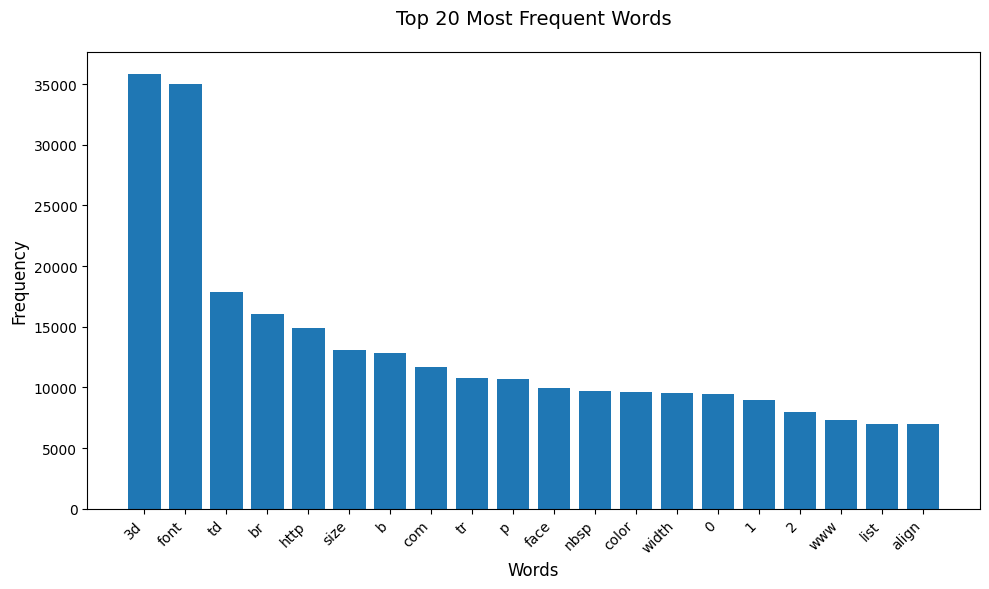

In [14]:
import seaborn as sns

sorted_dict = dict(sorted(token_counter.items(),
                         key=lambda x: x[1],
                         reverse=True)[:20])

plt.figure(figsize=(10, 6))
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.title('Top 20 Most Frequent Words', fontsize=14, pad=20)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [15]:
def keep_token(processed_token, threshold):
    '''
    Return all the token that have more than 1 count.
    '''

    if processed_token not in token_counter:
        return False
    else:
        train_df
        return token_counter[processed_token] > threshold

In [16]:
# Parse through the set
features = set()

for token in token_counter:
    if keep_token(token, 10000):
        features.add(token)

features

{'3d', 'b', 'br', 'com', 'font', 'http', 'p', 'size', 'td', 'tr'}

In [17]:
features = list(features)
features

['com', 'p', 'http', 'font', 'size', 'tr', '3d', 'b', 'br', 'td']

In [18]:
# token to index mapping - Converting a word to a number/integer
token_to_index = {t:i for t, i in zip(features, range(len(features)))}
token_to_index

{'com': 0,
 'p': 1,
 'http': 2,
 'font': 3,
 'size': 4,
 'tr': 5,
 '3d': 6,
 'b': 7,
 'br': 8,
 'td': 9}

## BAG OF WORDS

In [19]:
import numpy as np

def msg_to_count(message):
    count_vector = np.zeros(len(features))
    processed_list_of_tokens =  transform_text(message)

    for token in processed_list_of_tokens:
        if token not in features:
            continue
        index = token_to_index[token]
        count_vector[index] += 1
    return count_vector

In [20]:
msg_to_count(train_df['MESSAGE'].iloc[0])

array([ 9.,  0.,  6.,  4.,  2.,  0.,  0.,  2., 33.,  0.])

In [21]:
train_df.iloc[0]

,0
CATEGORY,1
MESSAGE,"\n\n<HTML><FONT BACK=""#ffffff"" style=""BACKGRO..."
FILE_NAME,00118.141d803810acd9d4fc23db103dddfcd9


## TRAINING AND TESTING

In [22]:
def x_y(df):
    y = df['CATEGORY'].to_numpy().astype(int)

    msg = df['MESSAGE']
    count_vectors = []

    for message in msg:
        count_vector = msg_to_count(message)
        count_vectors.append(count_vector)

    x = np.array(count_vectors).astype(int)

    return x, y

In [23]:
x_train, y_train = x_y(train_df)
x_test, y_test =  x_y(test_df)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4636, 10), (4636,), (1160, 10), (1160,))

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(x_train)

x_train, x_test = scaler.transform(x_train), scaler.transform(x_test)
x_train, x_test

(array([[0.04265403, 0.        , 0.025     , ..., 0.00985222, 0.04064039,
         0.        ],
        [0.00947867, 0.04065041, 0.00833333, ..., 0.0591133 , 0.0270936 ,
         0.01346801],
        [0.00473934, 0.00406504, 0.00416667, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.00947867, 0.        , 0.00416667, ..., 0.        , 0.        ,
         0.        ],
        [0.00947867, 0.        , 0.00416667, ..., 0.        , 0.        ,
         0.        ],
        [0.01895735, 0.00406504, 0.0125    , ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.00947867, 0.        , 0.01666667, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00947867, 0.        , 0.01666667, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.00473934, 0.        , 0.00416667, ..., 0.        , 0.        ,
         0.        ],
        [0.0

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       788
           1       0.99      0.32      0.48       372

    accuracy                           0.78      1160
   macro avg       0.87      0.66      0.67      1160
weighted avg       0.83      0.78      0.74      1160



The classification report suggests that the model is biased when predicting "1" and "0" due to class imbalancement. \
While the accuracy looks decent, the recall metrics for "1" is deceiving.

Bias has to be taken care of when tuning the model.
-- Upsampling and Downsampling using SMOTE or other techniques that leverages distribution to create new datapoints or drop the existing points.

In [30]:
# Compare Logistic Regression model to Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(x_train, y_train)
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       788
           1       0.90      0.56      0.69       372

    accuracy                           0.84      1160
   macro avg       0.86      0.77      0.79      1160
weighted avg       0.85      0.84      0.83      1160



# **Comparison of Classification Models: Original Model vs. Random Forest**

## **1. Introduction**
In this analysis, we compare the performance of two classification models: an original model Logistic Regression and a Random Forest model. We will evaluate them using the classification report, which provides **precision, recall, F1-score, and support** for each class.

## **2. Classification Report Explanation**
A classification report contains key evaluation metrics:
- **Precision**: The proportion of true positives among predicted positives. High precision means fewer false positives.
- **Recall**: The proportion of true positives detected out of all actual positives. High recall means fewer false negatives.
- **F1-score**: The harmonic mean of precision and recall. It balances the two metrics.
- **Support**: The number of actual occurrences of each class in the dataset.

## **3. Model Comparison**

### **Original Model Performance**
```
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       788
           1       0.99      0.32      0.48       372

    accuracy                           0.78      1160
   macro avg       0.87      0.66      0.67      1160
weighted avg       0.83      0.78      0.74      1160
```

### **Random Forest Performance**
```
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       788
           1       0.90      0.56      0.69       372

    accuracy                           0.84      1160
   macro avg       0.86      0.77      0.79      1160
weighted avg       0.85      0.84      0.83      1160
```

## **4. Key Observations**

| Metric      | Logisic Regression | Random Forest | Improvement? |
|------------|---------------|---------------|-------------|
| **Precision (Class 0)** | 0.76 | 0.83 | ✅ Higher (fewer false positives) |
| **Recall (Class 0)** | 1.00 | 0.97 | 🔻 Slightly lower (more false negatives) |
| **F1-Score (Class 0)** | 0.86 | 0.89 | ✅ Higher overall balance |
| **Precision (Class 1)** | 0.99 | 0.90 | 🔻 Lower, but more balanced |
| **Recall (Class 1)** | 0.32 | 0.56 | ✅ Much higher (fewer false negatives) |
| **F1-Score (Class 1)** | 0.48 | 0.69 | ✅ Big improvement |
| **Accuracy** | 0.78 | 0.84 | ✅ Higher overall accuracy |
| **Macro Average Recall** | 0.66 | 0.77 | ✅ More balanced recall across classes |
| **Weighted Average F1-Score** | 0.74 | 0.83 | ✅ Improved overall performance |

## **5. Conclusion: Which Model is Better?**
✅ **Random Forest is the better model overall** because:
- It **improves recall for Class 1**, meaning fewer false negatives.
- It **maintains high precision while reducing bias towards Class 0**.
- It **improves overall accuracy and F1-score**, leading to better balance between precision and recall.

📌 However, if **precision for Class 1 was the most important metric (e.g., fraud detection, medical diagnosis where false positives are costly)**, the original model might be preferred. Otherwise, **Random Forest is the better choice for a well-balanced classification task.**
